In [1]:
%config IPCompleter.greedy=True

[jupyter notebook guide](https://www.analyticsvidhya.com/blog/2018/05/starters-guide-jupyter-notebook/)

___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# RNN Example for Sine Wave

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  2


In [4]:
# To turn on memory growth for a specific GPU, use the following code 
# prior to allocating any tensors or executing any ops.gpus = tf.config.experimental.list_physical_devices('GPU')

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

2 Physical GPUs, 2 Logical GPUs


## Data

Let's use Numpy to create a simple sine wave.

In [5]:
np.linspace(10,15,6) #from 10 to 15(including) evenly divide(dividing area is 6-1 = 5) with 6 dividing numbers 

array([10., 11., 12., 13., 14., 15.])

In [6]:
x = np.linspace(0,50,501) # from 0 to 50 -> 500(501-1) areas with 501 divinding number(last number is 50)
y = np.sin(x)

In [7]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [8]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

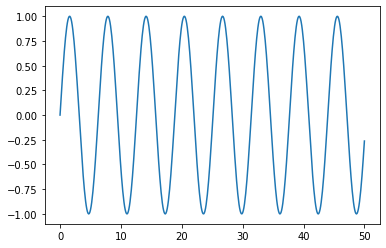

In [9]:
plt.plot(x,y)

Let's turn this into a DataFrame

In [10]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [11]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


## Train Test Split

Note! This is very different from our usual test/train split methodology!

In [12]:
len(df)

501

In [13]:
test_percent = 0.1

In [14]:
len(df)*test_percent

50.1

In [15]:
test_point = np.round(len(df)*test_percent)
test_point

50.0

In [16]:
test_ind = int(len(df) - test_point)

In [17]:
test_ind

451

In [18]:
train = df.iloc[:test_ind] #[:451]
test = df.iloc[test_ind:] #[451:]

In [19]:
print(len(train))
train

451


,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [20]:
print(len(test))
test

50


,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


## Scale Data

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [24]:
scaled_train = scaler.transform(train)  # predict(scaled_train) -> scaled_test[0]
scaled_test = scaler.transform(test)

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [25]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [26]:
# scaled_train

In [27]:
# define generator
length = 2 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [28]:
len(scaled_train)

451

In [29]:
len(generator) # n_input = 2

449

In [30]:
# scaled_train

In [31]:
# What does the first batch look like?
X,y = generator[0]

In [32]:
print(X.shape)
X

(1, 2, 1)


array([[[0.49999912],
        [0.54991622]]])

In [33]:
print(X.flatten().shape)

(2,)


In [34]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.49999912 0.54991622]
Predict this y: 
 [[0.59933458]]


In [35]:
# Let's redefine to get 10 steps back and then predict the next step out
length = 10 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1) # 10,1)

In [36]:
# What does the first batch look like?
X,y = generator[0]

In [37]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.49999912 0.54991622 0.59933458 0.64776041 0.69470985 0.73971381
 0.78232262 0.82211054 0.85868004 0.89166571]
Predict this y: 
 [[0.92073798]]


In [38]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

Now you will be able to edit the length so that it makes sense for your time series!

### Create the Model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,SimpleRNN

In [40]:
# We're only using one feature in our time series
n_features = 1

In [41]:
# # define model
# model = Sequential()

# # Simple RNN layer
# model.add(SimpleRNN(50,input_shape=(length, n_features)))

# # Final Prediction
# model.add(Dense(1))

# model.compile(optimizer='adam', loss='mse')

In [42]:
with tf.device('/GPU:1'):
    # define model
    model = Sequential()

    # Simple RNN layer
    model.add(SimpleRNN(50,input_shape=(length, n_features))) #output neurons 50, input(50,1)

    # Final Prediction
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse')

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


#### Kernel Restarting The kernel appears to have died. It will restart automatically (Jupyter-Tensorflow) : Error when using multiple jupyters- train models ->``tf.config.experimental.set_memory_growth(gpu, True)`` It works !!

* To turn on memory growth for a specific GPU, use the following code prior to allocating any tensors or executing any ops. ``tf.config.experimental.set_memory_growth(gpu, True)`` -> It works !!

In [44]:
# fit model
model.fit_generator(generator,epochs=5)

Epoch 1/5
401/401 [==============================] - 34s 85ms/step - loss: 0.0022
Epoch 2/5
401/401 [==============================] - 33s 83ms/step - loss: 8.9132e-05
Epoch 3/5
401/401 [==============================] - 33s 83ms/step - loss: 1.0565e-04
Epoch 4/5
401/401 [==============================] - 33s 82ms/step - loss: 2.7387e-04
Epoch 5/5
401/401 [==============================] - 34s 84ms/step - loss: 8.0309e-05


In [45]:
model.history.history.keys()

dict_keys(['loss'])

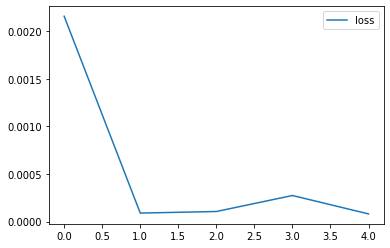

In [46]:
#Doon't excute this line : original output
losses = pd.DataFrame(model.history.history)
losses.plot()

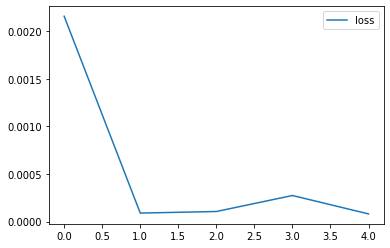

In [47]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data : last 50 elements of scaled_train (50,1) -> (1, 50, 1)

In [48]:
print(scaled_train.shape)#(451, 1)
# scaled_train

(451, 1)


In [49]:
first_eval_batch = scaled_train[-length:] #[-50:]
first_eval_batch.shape

(50, 1)

In [50]:
first_eval_batch#(50,1)

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [51]:
##option 1
# first_eval_batch = first_eval_batch.reshape((1, length, n_features)) #(50,1 ) -> (1, 50 ,1)

In [52]:
#option 2
first_eval_batch = first_eval_batch[np.newaxis,:,:] #(50,1 ) -> (1, 50 ,1)

* predict, predict_classes is expecting a 2D array of shape (**num_instances**, features), like X_test is(X_test.shape is (1,784)). But indexing a single instance as in X_test[10] returns a 1D array of shape (features,).

* To add back the extra axis, you can use np.expand_dims(X_test[10], axis=0), or X_test[10][**np.newaxis**,:], or don't get rid of it in the first place (e.g., by using X_test[10:11]). or  X_test[10].reshape(1, 784)

In [53]:
#predict value based on X, training dataset.
model.predict(first_eval_batch)#(1, 50 ,1) <- insert number_of_instance( 1 ) at first axis

array([[0.9542481]], dtype=float32)

In [54]:
#actual y value.
scaled_test[0]

array([0.94955134])

In [55]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


Now let's put this logic in a for loop to predict into the future for the entire test range.

----

In [56]:
test_predictions = []

first_eval_batch = scaled_train[-length:]#[-50:]
print(first_eval_batch.shape)
current_batch = first_eval_batch.reshape((1, length, n_features))#(1, 50 ,1)

(50, 1)


In [57]:
current_batch.shape

(1, 50, 1)

In [58]:
print(current_batch.shape)
current_batch#(1,50,1)

(1, 50, 1)


array([[[8.37405820e-01],
        [7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.5

In [59]:
print(current_batch[:,1:,:].shape)
current_batch[:,1:,:] #shift forward to index 1(remove index 0): (1,50,1) -> (1,49,1)

(1, 49, 1)


array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

In [60]:
np.array([[[99]]]).shape

(1, 1, 1)

In [61]:
## Test to append new element [[[99]]] into current_batch which is shifted to index 1 (1,49,1)
np.append(current_batch[:,1:,:],[[[99]]],axis=1) #(1,49,1) , (1,1,1) 
# np.append(current_batch[:,1:,:],[99],axis=1) #(1,49,1) , (1,1,1) #dimesion error(3-d, 1-d)

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

**NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [62]:
print(model.predict(current_batch))
print(model.predict(current_batch).shape)

[[0.9542481]]
(1, 1)


In [63]:
print(model.predict(current_batch)[0]) #[0] is for grabbing just the number instead of [array]
print(model.predict(current_batch)[0].shape) 

[0.9542481]
(1,)


In [64]:
print([[model.predict(current_batch)[0]]])

[[array([0.9542481], dtype=float32)]]


In [65]:
len(test)

50

In [66]:
my_1d = np.array([99]).shape
my_1d

(1,)

In [67]:
test_predictions = []

first_eval_batch = scaled_train[-length:]#[-50:]
current_batch = first_eval_batch.reshape((1, length, n_features)) #(1,50,1)

for i in range(len(test)): #50
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0] #[0] convert to [0.9436601],(1,) from [[0.9436601]],(1,1)
    
    # store prediction
    test_predictions.append(current_pred) #[].append([0.9436601]) -> test_predictions : list length is 50
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)#(1,49,1), [[(1,)]]->(1,1,1)

In [68]:
## test
#show dimesion of list(when not np.array -> change to ndarray then .shape )
test_list_dim = [[[2,3], [4,2], [3,2]]]
print(len(test_list_dim))#first dimension
print(len(test_list_dim[0])) #second dimension
print(len(test_list_dim[0][0])) #third dimension
print("------------np.array------------------------")
np.array(test_list_dim).shape

1
3
2
------------np.array------------------------


(1, 3, 2)

In [69]:
def dim(a):
    if not type(a) == list:
        return []
    return [len(a)] + dim(a[0]) #list + list -> list

In [70]:
#test def dim(a): explained!
print(type(test_list_dim))
print(test_list_dim)
print(len(test_list_dim))

<class 'list'>
[[[2, 3], [4, 2], [3, 2]]]
1


In [71]:
print(type(test_list_dim[0]))
print(test_list_dim[0])
print(len(test_list_dim[0]))

<class 'list'>
[[2, 3], [4, 2], [3, 2]]
3


In [72]:
print(type(test_list_dim[0][0]))
print(test_list_dim[0][0])
print(len(test_list_dim[0][0]))

<class 'list'>
[2, 3]
2


In [73]:
print(type(test_list_dim[0][0][0]))
print(test_list_dim[0][0][0])
# print(len(test_list_dim[0][0][0])) #TypeError: object of type 'int' has no len(): len(2)-> error!

<class 'int'>
2


In [74]:
dim(test_list_dim)

[1, 3, 2]

In [75]:
# test
print("1st dimension: ",len(test_predictions))
print("2nd dimension: ",len(test_predictions[0]))

# print(test_predictions)
print("**shape** : ",np.array(test_predictions).shape)
print("-------------- #list of np array -----------")
print(type(test_predictions)) 
print(type(test_predictions[0]))

test_predictions #list of np array, length 50

1st dimension:  50
2nd dimension:  1
**shape** :  (50, 1)
-------------- #list of np array -----------
<class 'list'>
<class 'numpy.ndarray'>


[array([0.9542481], dtype=float32),
 array([0.9742047], dtype=float32),
 array([0.98951966], dtype=float32),
 array([1.001604], dtype=float32),
 array([1.0070533], dtype=float32),
 array([1.0063715], dtype=float32),
 array([1.0034169], dtype=float32),
 array([0.9940656], dtype=float32),
 array([0.97829014], dtype=float32),
 array([0.96094835], dtype=float32),
 array([0.93837106], dtype=float32),
 array([0.90848136], dtype=float32),
 array([0.8777798], dtype=float32),
 array([0.8433509], dtype=float32),
 array([0.8028036], dtype=float32),
 array([0.76109385], dtype=float32),
 array([0.7185779], dtype=float32),
 array([0.6702838], dtype=float32),
 array([0.62141937], dtype=float32),
 array([0.5725298], dtype=float32),
 array([0.52016586], dtype=float32),
 array([0.46675447], dtype=float32),
 array([0.4161359], dtype=float32),
 array([0.36401618], dtype=float32),
 array([0.3113548], dtype=float32),
 array([0.26340333], dtype=float32),
 array([0.21692154], dtype=float32),
 array([0.1706364

In [76]:
print(scaled_test.shape)
scaled_test

(50, 1)


array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


## Inverse Transformations(Undo the scaling of X according to feature_range.) and Compare

In [77]:
#convert to 2-d nd array: array([[0.8],[0.9],...]) , shape is (50,1)
# from a list consists of 50 np array:[[array([9.], array([8.]),...))]]
true_predictions = scaler.inverse_transform(test_predictions)  

In [78]:
#test
print("1st dimension: ",len(true_predictions))
print("2nd dimension: ",len(true_predictions[0]))

print("**shape** : ",true_predictions.shape) 
print("-----------np array with 2-d list--------------")
print(type(true_predictions)) 
print(type(true_predictions[0]))
true_predictions

1st dimension:  50
2nd dimension:  1
**shape** :  (50, 1)
-----------np array with 2-d list--------------
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([[ 0.90849062],
       [ 0.9484036 ],
       [ 0.97903322],
       [ 1.00320164],
       [ 1.01410014],
       [ 1.01273664],
       [ 1.00682748],
       [ 0.988125  ],
       [ 0.95657437],
       [ 0.92189107],
       [ 0.87673686],
       [ 0.81695793],
       [ 0.75555527],
       [ 0.68669803],
       [ 0.60560406],
       [ 0.52218529],
       [ 0.4371541 ],
       [ 0.34056662],
       [ 0.24283856],
       [ 0.14506019],
       [ 0.04033317],
       [-0.06648877],
       [-0.16772507],
       [-0.2719637 ],
       [-0.37728563],
       [-0.47318778],
       [-0.56615061],
       [-0.65872   ],
       [-0.74003608],
       [-0.81090462],
       [-0.87895536],
       [-0.93529996],
       [-0.9750176 ],
       [-1.01012925],
       [-1.03564665],
       [-1.04158725],
       [-1.03935757],
       [-1.03366654],
       [-1.00717661],
       [-0.96904705],
       [-0.93328538],
       [-0.88030425],
       [-0.81116355],
       [-0.74913844],
       [-0.6777691 ],
       [-0

In [79]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [80]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

/home/ys/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [81]:
test

,Sine,Predictions
45.1,0.899097,0.908491
45.2,0.938307,0.948404
45.3,0.968142,0.979033
45.4,0.988304,1.003202
45.5,0.998591,1.014100
45.6,0.998900,1.012737
45.7,0.989229,1.006827
45.8,0.969673,0.988125
45.9,0.940429,0.956574
46.0,0.901788,0.921891


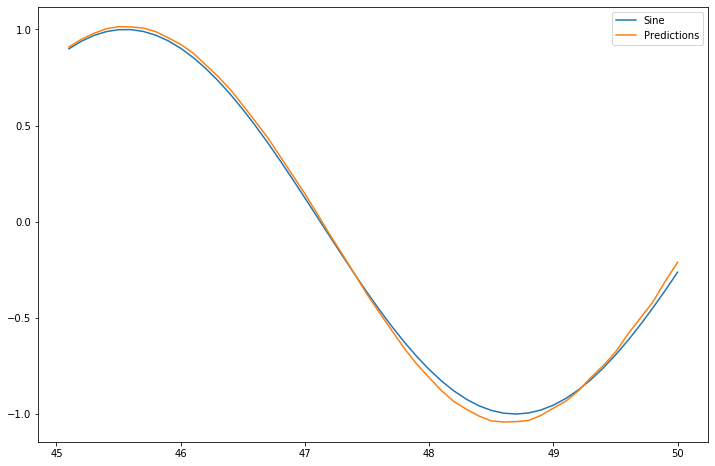

In [82]:
test.plot(figsize=(12,8))

## Adding in Early Stopping and Validation Generator

In [83]:
from tensorflow.keras.callbacks import EarlyStopping

In [84]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [85]:
length = 49
generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length=length,batch_size=1) #49,1


validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                          length=length,batch_size=1) #49,1

# LSTMS

In [86]:
# define model
model = Sequential()

# Simple RNN layer
model.add(LSTM(50,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [87]:
model.fit_generator(generator,epochs=20,
                   validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
402/402 [==============================] - 8s 19ms/step - loss: 0.0235 - val_loss: 8.5241e-06
Epoch 2/20
402/402 [==============================] - 6s 16ms/step - loss: 3.7326e-05 - val_loss: 8.0743e-06
Epoch 3/20
402/402 [==============================] - 6s 16ms/step - loss: 1.3447e-04 - val_loss: 6.9141e-06
Epoch 4/20
402/402 [==============================] - 6s 15ms/step - loss: 5.9489e-05 - val_loss: 2.5071e-07
Epoch 5/20
402/402 [==============================] - 6s 15ms/step - loss: 2.5536e-04 - val_loss: 6.2073e-05
Epoch 6/20
402/402 [==============================] - 6s 16ms/step - loss: 2.8069e-04 - val_loss: 2.7831e-06


In [88]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

/home/ys/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


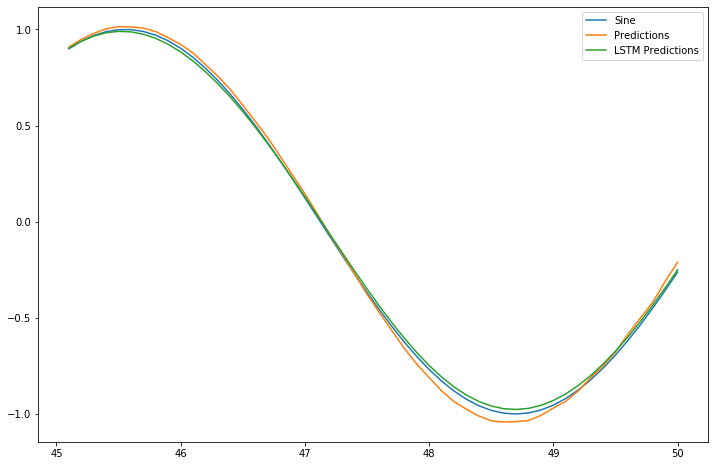

In [89]:
# IGNORE WARNINGS
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12,8))

# Forecasting

Forecast into unknown range. We should first utilize all our data, since we are now forecasting!

In [90]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [91]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [92]:
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator,epochs=6)

Epoch 1/6
451/451 [==============================] - 7s 16ms/step - loss: 0.0104
Epoch 2/6
451/451 [==============================] - 7s 16ms/step - loss: 1.0097e-04
Epoch 3/6
451/451 [==============================] - 7s 16ms/step - loss: 6.5019e-05
Epoch 4/6
451/451 [==============================] - 7s 16ms/step - loss: 3.9807e-04
Epoch 5/6
451/451 [==============================] - 7s 16ms/step - loss: 5.3698e-04
Epoch 6/6
451/451 [==============================] - 7s 16ms/step - loss: 4.9115e-05


In [93]:
forecast = []

first_eval_batch = scaled_full_data[-length:] #[-50:]
current_batch = first_eval_batch.reshape((1, length, n_features)) #(1,50,1)

In [94]:
#test
print(model.predict(current_batch))
print(model.predict(current_batch).shape)

[[0.41119924]]
(1, 1)


In [95]:
#test
print(model.predict(current_batch)[0]) #[0] is for grabbing just the number instead of [array]
print(model.predict(current_batch)[0].shape) 

[0.41119924]
(1,)


In [96]:
for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0] #[0] convert to [0.06019329] (1,)  from [[0.06019329]] (1,1) 
    
    # store prediction
    forecast.append(current_pred) #[].append [0.4167821] (1,) -> [[0.4167821],[],...]
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1) #(1,49,1), [[[0.4167821]]](1,1,1)

In [124]:
print(len(forecast))
print(len(forecast[0]))

50
1


In [125]:
# def dim(n):
#     if type(n) is not list:
#         return []
#     return [len(n)] + dim(n[0])

def dim(a):
    if not type(a) == list:
        return []
    return [len(a)] + dim(a[0])

In [126]:
dim(forecast)

[50]

In [127]:
forecast #list of np.array

[array([0.41119924], dtype=float32),
 array([0.46085], dtype=float32),
 array([0.51073116], dtype=float32),
 array([0.5603994], dtype=float32),
 array([0.6093657], dtype=float32),
 array([0.6571157], dtype=float32),
 array([0.703121], dtype=float32),
 array([0.7468526], dtype=float32),
 array([0.7877923], dtype=float32),
 array([0.8254477], dtype=float32),
 array([0.859363], dtype=float32),
 array([0.88913155], dtype=float32),
 array([0.9144042], dtype=float32),
 array([0.93489724], dtype=float32),
 array([0.9503956], dtype=float32),
 array([0.9607548], dtype=float32),
 array([0.96589917], dtype=float32),
 array([0.96581936], dtype=float32),
 array([0.96056485], dtype=float32),
 array([0.9502405], dtype=float32),
 array([0.93499696], dtype=float32),
 array([0.9150274], dtype=float32),
 array([0.89055943], dtype=float32),
 array([0.8618513], dtype=float32),
 array([0.829189], dtype=float32),
 array([0.7928836], dtype=float32),
 array([0.75327], dtype=float32),
 array([0.71070737], dtype

In [128]:
#Scale back the data to the original representation
forecast = scaler.inverse_transform(forecast) #np.array of list

In [129]:
print(forecast.shape)
forecast

(50, 1)


array([[-0.17759832],
       [-0.0782976 ],
       [ 0.02146392],
       [ 0.12079962],
       [ 0.21873142],
       [ 0.31423064],
       [ 0.40624052],
       [ 0.49370296],
       [ 0.5755818 ],
       [ 0.6508919 ],
       [ 0.71872204],
       [ 0.77825861],
       [ 0.82880354],
       [ 0.86978928],
       [ 0.90078571],
       [ 0.921504  ],
       [ 0.93179263],
       [ 0.93163301],
       [ 0.92112408],
       [ 0.90047553],
       [ 0.86998871],
       [ 0.83004987],
       [ 0.78111437],
       [ 0.72369851],
       [ 0.65837449],
       [ 0.58576422],
       [ 0.50653764],
       [ 0.42141312],
       [ 0.33115906],
       [ 0.23659657],
       [ 0.13860315],
       [ 0.03811363],
       [-0.06387828],
       [-0.16632211],
       [-0.26811786],
       [-0.36812614],
       [-0.46518545],
       [-0.55813442],
       [-0.64583796],
       [-0.72721698],
       [-0.80127699],
       [-0.86713462],
       [-0.92403845],
       [-0.97138318],
       [-1.00871571],
       [-1

In [130]:
df #(501,1)

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [131]:
len(forecast)

50

In [132]:
50*0.1

5.0

In [133]:
forecast_index = np.arange(50.1,55.1,step=0.1)

In [134]:
len(forecast_index)

50

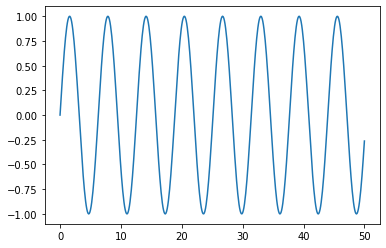

In [136]:
plt.plot(df.index,df['Sine']) #(501,1)

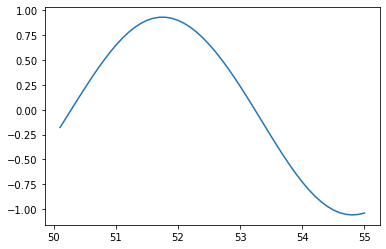

In [137]:
plt.plot(forecast_index,forecast) #(50,1)

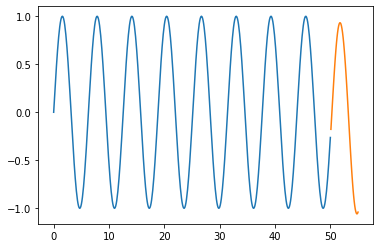

In [138]:
plt.plot(df.index,df['Sine']) #(501,1)
plt.plot(forecast_index,forecast) #(50,1)

# Great Job!